# Orders Dataset - Analysis

In [1]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
# import order training set
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=False)


## Inspect Features

In [4]:
# Get summary stats for each column

orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
count,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000,97007.000000
mean,12.564574,23.747123,0.774420,0.589061,0.100539,4.142237,1.142598,1.013968,136.895781,22.780658
std,9.542359,8.762100,4.747827,0.492007,0.300719,1.296559,0.540014,0.123772,208.701803,21.532648
min,0.533414,2.008009,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000
25%,6.771296,18.337187,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.850000
50%,10.225243,23.235741,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,86.000000,17.170000
75%,15.732506,28.416094,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,24.020000
max,209.628611,155.135463,188.975081,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000


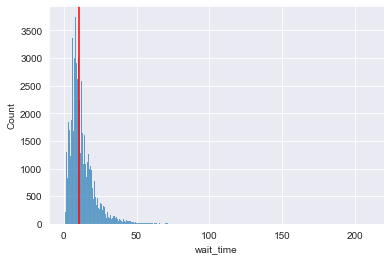

In [60]:
#histograms
# Seaborn - 'wait_time'
sns.set_style('darkgrid')
sns.histplot(data=orders['wait_time'])
median = orders['wait_time'].median()
plt.axvline(median, color='red');

'wait_time' is heavily skewed to the right indicating pull from outliers. 

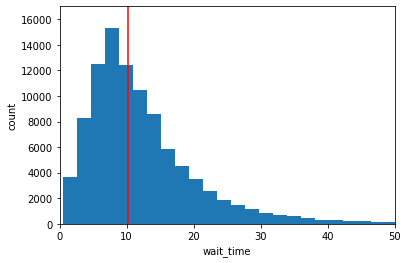

In [53]:
# Matplotlib - 'wait_time'
plt.hist(orders['wait_time'], bins=100)
plt.xlabel('wait_time')
plt.ylabel('count')
plt.xlim(0,50)
plt.ylim(0,17000)
median = orders['wait_time'].median()
plt.vlines(x=median, ymin=0, ymax=17000, color='red');

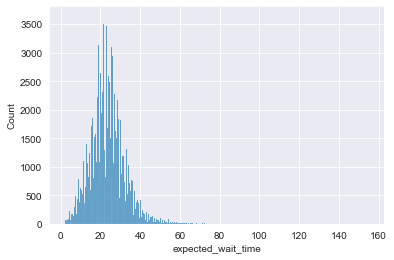

In [59]:
# histogram - 'expected_wait_time'
sns.histplot(orders['expected_wait_time']);

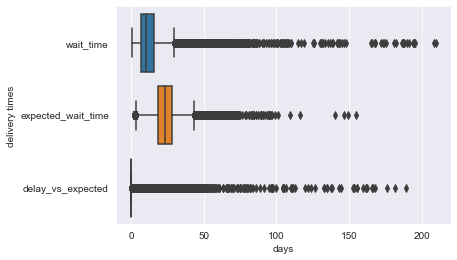

In [70]:
# Boxplots to compare distribution of variables on same scale
# 'wait_time', 'expected_wait_time', 'delay_vs_expected' units are in days

# Create Horizontal boxplots

# put dataframe into long format
orders_long = orders[['wait_time', 'expected_wait_time', 'delay_vs_expected']].melt(var_name='delivery times', value_name='days')

sns.boxplot(data=orders_long, y='delivery times', x='days');



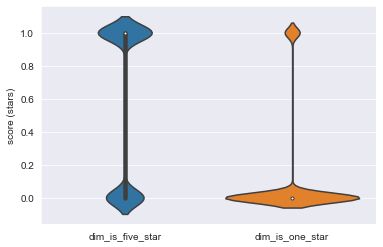

In [81]:
#Create boxplots for review-related columns: 'dim_is_five_star', 'dim_is_one_star'

sns.violinplot(data=orders[['dim_is_five_star', 'dim_is_one_star']])
plt.ylabel('score (stars)');

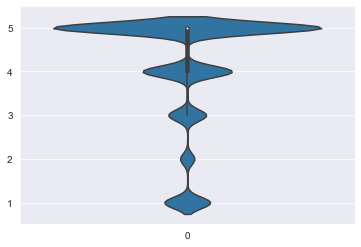

In [85]:
#Create violinplot for review-related columns: 'review_score'

sns.violinplot(data=orders['review_score']);



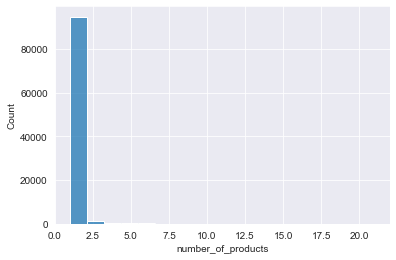

In [88]:
#Create histogram for 'number_of_products', 'number_of_sellers', 'price', 'freight_value'
sns.histplot(orders['number_of_products']);

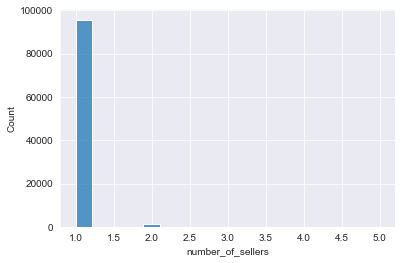

In [89]:
sns.histplot(orders['number_of_sellers']);

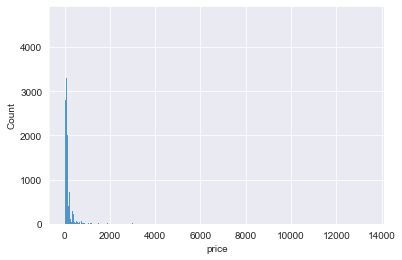

In [92]:
sns.histplot(orders['price']);

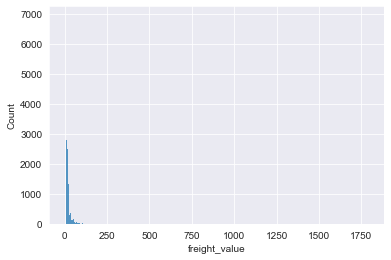

In [93]:
sns.histplot(orders['freight_value']);